In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
from mpmath import nsum
from tqdm import tqdm

In [2]:
from utils.dataset import Dataset
from utils.evaluate import Evalutate

from methods.varying_num_of_frogs import varying_frogs_posterior, varying_frogs_prior

In [3]:
dataset = Dataset()
dataset.set_data()
dataset.T

15

In [4]:
dataset.cum_nt

array([ 0,  1,  1,  1,  2,  4,  4,  5,  7,  8, 10, 12, 14, 15, 15, 15])

In [5]:
evaluate = Evalutate(dataset=dataset, prior=varying_frogs_prior, nparams=3)

In [6]:
evaluate.evaluate(varying_frogs_posterior)

In [7]:
pi_theta1_theta2 = lambda theta1, theta2, t: integrate.quad(lambda theta3: evaluate.posteriors[t](theta1, theta2, theta3), 0, 1)[0]
pi_theta2 = lambda theta2, t: float(nsum(lambda theta1: pi_theta1_theta2(theta1, theta2, t), [evaluate.dataset.cum_nt[t], np.inf]))

In [8]:
P_chongwen_is_true_love = lambda t: pi_theta2(1, t)

In [9]:
t_linspace = np.arange(0, dataset.T+1)
p_is_true_love = []
for t in tqdm(t_linspace): p_is_true_love.append(P_chongwen_is_true_love(t))
p_is_true_love = np.array(p_is_true_love)

  0%|          | 0/16 [00:00<?, ?it/s]

C:\Users\liuho\AppData\Local\Temp\ipykernel_25988\2033605001.py:1: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  pi_theta1_theta2 = lambda theta1, theta2, t: integrate.quad(lambda theta3: evaluate.posteriors[t](theta1, theta2, theta3), 0, 1)[0]
100%|██████████| 16/16 [00:30<00:00,  1.91s/it]


Text(0, 0.5, 'P(Chongwen is true love)')

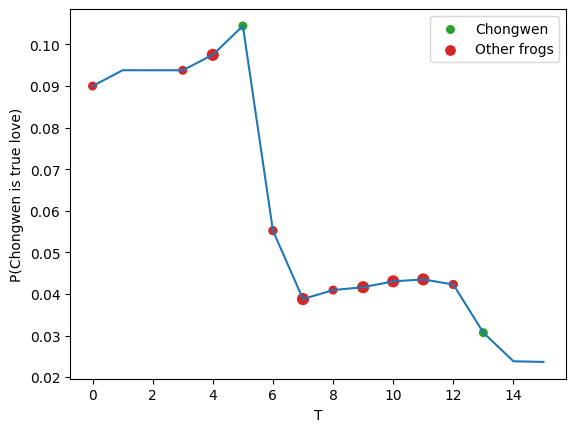

In [11]:
plt.plot(t_linspace, p_is_true_love)
plt.scatter(np.arange(dataset.T)[(dataset.mt>0)[1:]], p_is_true_love[:-1][(dataset.mt>0)[1:]], label="Chongwen", s=dataset.mt[dataset.mt>0]*30, c='tab:green', alpha=1)
plt.scatter(np.arange(dataset.T)[(dataset.nt>0)[1:]], p_is_true_love[:-1][(dataset.nt>0)[1:]], label="Other frogs", s=dataset.nt[dataset.nt>0]*30, c='tab:red', alpha=1)
plt.legend()
plt.xlabel('T')
plt.ylabel('P(Chongwen is true love)')